In [1]:
from evwTools import *
plt.rcParams['figure.facecolor'] = 'white'

Welcome to JupyROOT 6.12/06


In [3]:
f = r.TFile("./data/TestEvents_Ewest_gt_700_Eeast_lt_200_60hUnblinding.root")

In [5]:
tcomp = f.Get("evwTree")

In [7]:
fwave = r.TFile("./data/waveforms_15963_00151.root")
fwave.ls()
twave = fwave.Get("islands").Get("islands").Get("islandTree")

TFile**		./data/waveforms_15963_00151.root	
 TFile*		./data/waveforms_15963_00151.root	
  KEY: TDirectoryFile	islands;1	islands (CaloIslandAnalyzer) folder


In [12]:
twave.Print()

******************************************************************************
*Tree    :islandTree: Tree of xtal traces                                    *
*Entries :   325408 : Total =      1665594326 bytes  File  Size =  736192884 *
*        :          : Tree compression factor =   2.26                       *
******************************************************************************
*Br    0 :xtal0     : vector<short>                                          *
*Entries :   325408 : Total  Size=   30640579 bytes  File Size  =   13102699 *
*Baskets :      134 : Basket Size=    1336320 bytes  Compression=   2.34     *
*............................................................................*
*Br    1 :xtal1     : vector<short>                                          *
*Entries :   325408 : Total  Size=   30640579 bytes  File Size  =   13213685 *
*Baskets :      134 : Basket Size=    1336320 bytes  Compression=   2.32     *
*...................................................

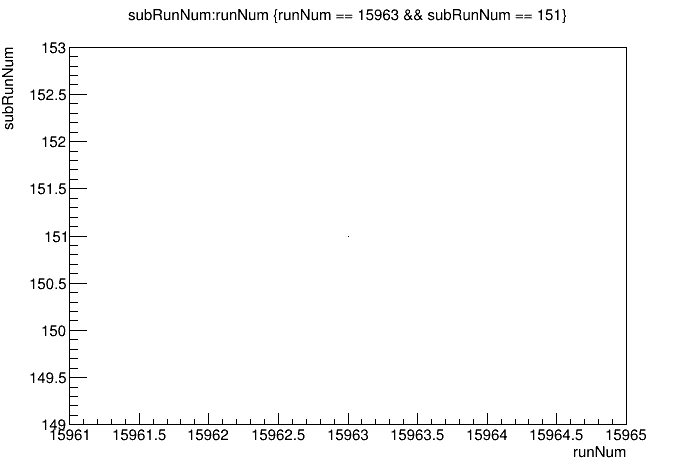

In [15]:
c = r.TCanvas()
condition = "runNum == 15963 && subRunNum == 151"
tcomp.Draw("subRunNum:runNum",condition)
c.Draw()

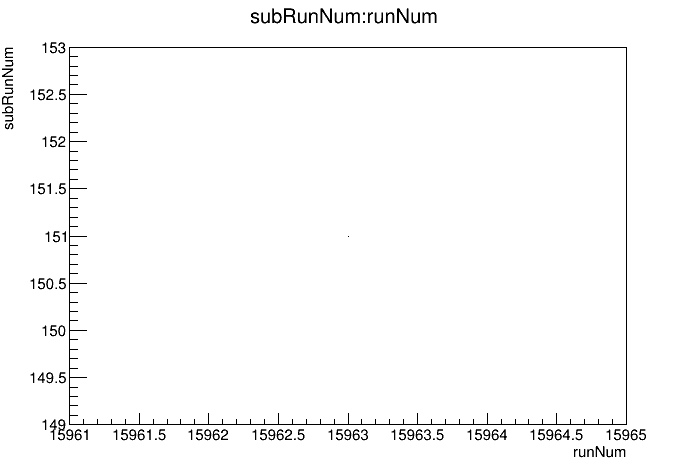

In [16]:
c = r.TCanvas()
twave.Draw("subRunNum:runNum")
c.Draw()

In [18]:
twave_partial = twave.CopyTree( "fillNum == 95 && islandNum == 56 && caloNum == 14" )
twave_partial.Print()

******************************************************************************
*Tree    :islandTree: Tree of xtal traces                                    *
*Entries :        1 : Total =           49876 bytes  File  Size =          0 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :xtal0     : vector<short>                                          *
*Entries :        1 : Total  Size=        743 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=    1336320 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :xtal1     : vector<short>                                          *
*Entries :        1 : Total  Size=        743 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=    1336320 bytes  Compression=   1.00     *
*...................................................

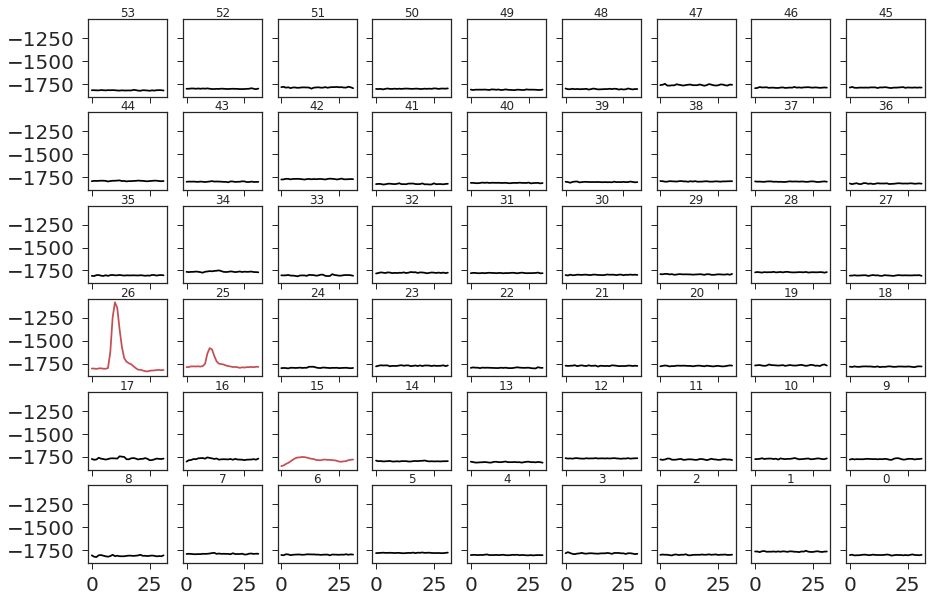

In [21]:
for i,entry in enumerate(twave_partial):
    fig, axarr = plt.subplots(6,9, sharey=True, sharex=True,figsize=(15, 10))
    #print("Entry #", i+1)
    plotVec = []
    for crystal in range(0,54):
        branchString = "twave.xtal"+str(crystal)
        entryVeci = []
        rootVec = eval(branchString)# t.xtal53
        length = rootVec.size()
        for ding in range(length):
            entryVeci.append( rootVec[ding] )
        plotVec.append(entryVeci)

    plotVec.reverse()
    list1 = []
    list2 = []
    xtal = []
    list2xtal = []
    for crystal in range(54):
        list2.append(plotVec[crystal]) 
        list2xtal.append(crystal)
        if (crystal+1) % 9 == 0: #split into 9 column blocks
            list1.append(list2)
            list2 = []
            list2xtal.reverse()
            xtal.append(list2xtal)
            list2xtal = []
    xtal.reverse()

    aboveThresholdVec = []
    for ding in range(9):
        for j in range(6):
            if(len(list1[j][ding]) < 1):
                axarr[j,ding].plot(list1[j][ding],color='g') 
            elif(np.abs( np.mean((list1[j][ding])[0:6]) - np.max(list1[j][ding]) ) > 60): #global threshold = 60
                axarr[j,ding].plot(list1[j][ding],color='r') 
                aboveThresholdVec.append( (j, ding) )
            else:
                axarr[j,ding].plot(list1[j][ding],color='black') 
            axarr[j,ding].set_title(str(xtal[j][ding]),y = 0.95)